### Missing Values Imputation

### References

#### machine learning mastery
- https://machinelearningmastery.com/handle-missing-data-python/

##### scikit learn
- http://pandas.pydata.org/pandas-docs/stable/missing_data.html
- http://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values
- http://scikit-learn.org/0.15/auto_examples/imputation.html
- http://scikit-learn.org/0.15/modules/generated/sklearn.preprocessing.Imputer.html#sklearn.preprocessing.Imputer

##### stack overflow
- https://stackoverflow.com/questions/27824954/how-to-handle-missing-nans-for-machine-learning-in-python
- https://stackoverflow.com/questions/45321406/missing-value-imputation-in-python-using-knn

##### Other sources
- http://r-statistics.co/Missing-Value-Treatment-With-R.html
- http://dataaspirant.com/2016/12/30/k-nearest-neighbor-implementation-scikit-learn/
- http://www.awesomestats.in/python-data-preprocessing/
- https://towardsdatascience.com/the-use-of-knn-for-missing-values-cf33d935c637

##### analytics vidhya
- https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/

### Import Libraries

In [1]:
# Data Analysis Libraries
import numpy as np
import pandas as pd

#ML libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Customized Utilities
from Utilities.Summarize import Summarize as smr
from Utilities.color import color

#To impute Missing Values
import knnimpute
from sklearn.preprocessing import Imputer

### Missing Values

Missing values can be of three general types:


  - <b> Missing Completely At Random (MCAR): </b> When missing data are MCAR, the presence/absence of data is completely independent of observable variables and parameters of interest. In this case, the analysis performed on the data are unbiased. In practice, it is highly unlikely.


    
  - <b> Missing At Random (MAR): </b> When missing data is not random but can be totally related to a variable where there is complete information. An example is that males are less likely to fill in a depression survey but this has nothing to do with their level of depression, after accounting for maleness. This kind of missing data can induce a bias in your analysis especially if it unbalances your data because of many missing values in a certain category.
    
    
    
  - <b> Missing Not At Random (MNAR): </b> Not missing at random, bad. Consider having survey for level of income. And again, you have more females than males participants. In this case, this is a problem, because level of income is related to gender. Therefore your results will be biased. Not easily to get rid of.
  
There are really four ways you can handle missing values:

  - <b> Deleting the observations : </b> If we have large number of observations in your dataset, where all the classes to be predicted are sufficiently represented in the training data, then try deleting (or not to include missing values while model building, for example by setting na.action=na.omit) those observations (rows) that contain missing values. Make sure after deleting the observations, you have:


  - <b> Deleting the variable : </b> If a paricular variable is having more missing values that rest of the variables in the dataset, and, if by removing that one variable you can save many observations, then you are better off without that variable unless it is a really important predictor that makes a lot of business sense. It is a matter of deciding between the importance of the variable and losing out on a number of observations.


  - <b> Imputation with mean / median / mode : </b> Replacing the missing values with the mean / median / mode is a crude way of treating missing values. Depending on the context, like if the variation is low or if the variable has low leverage over the response, such a rough approximation is acceptable and could possibly give satisfactory results.


  - <b> Prediction : </b> 

    - 4.1. kNN Imputation
    - 4.2. Other Models Imputation

<b> What is the best way to handle missing values in data set? </b>

There is NO best way, each solution/algorithm has their own pros and cons (and you can even mix some of them together to create your own strategy and tune the related parameters to come up one best satisfy your data, there are many research/papers about this topic).

For example, Mean Imputation is quick and simple, but it would underestimate the variance and the distribution shape is distorted by replacing NaN with the mean value, while KNN Imputation might not be ideal in a large data set in terms of time complexity, since it iterate over all the data points and perform calculation for each NaN value, and the assumption is that NaN attribute is correlated with other attributes. 

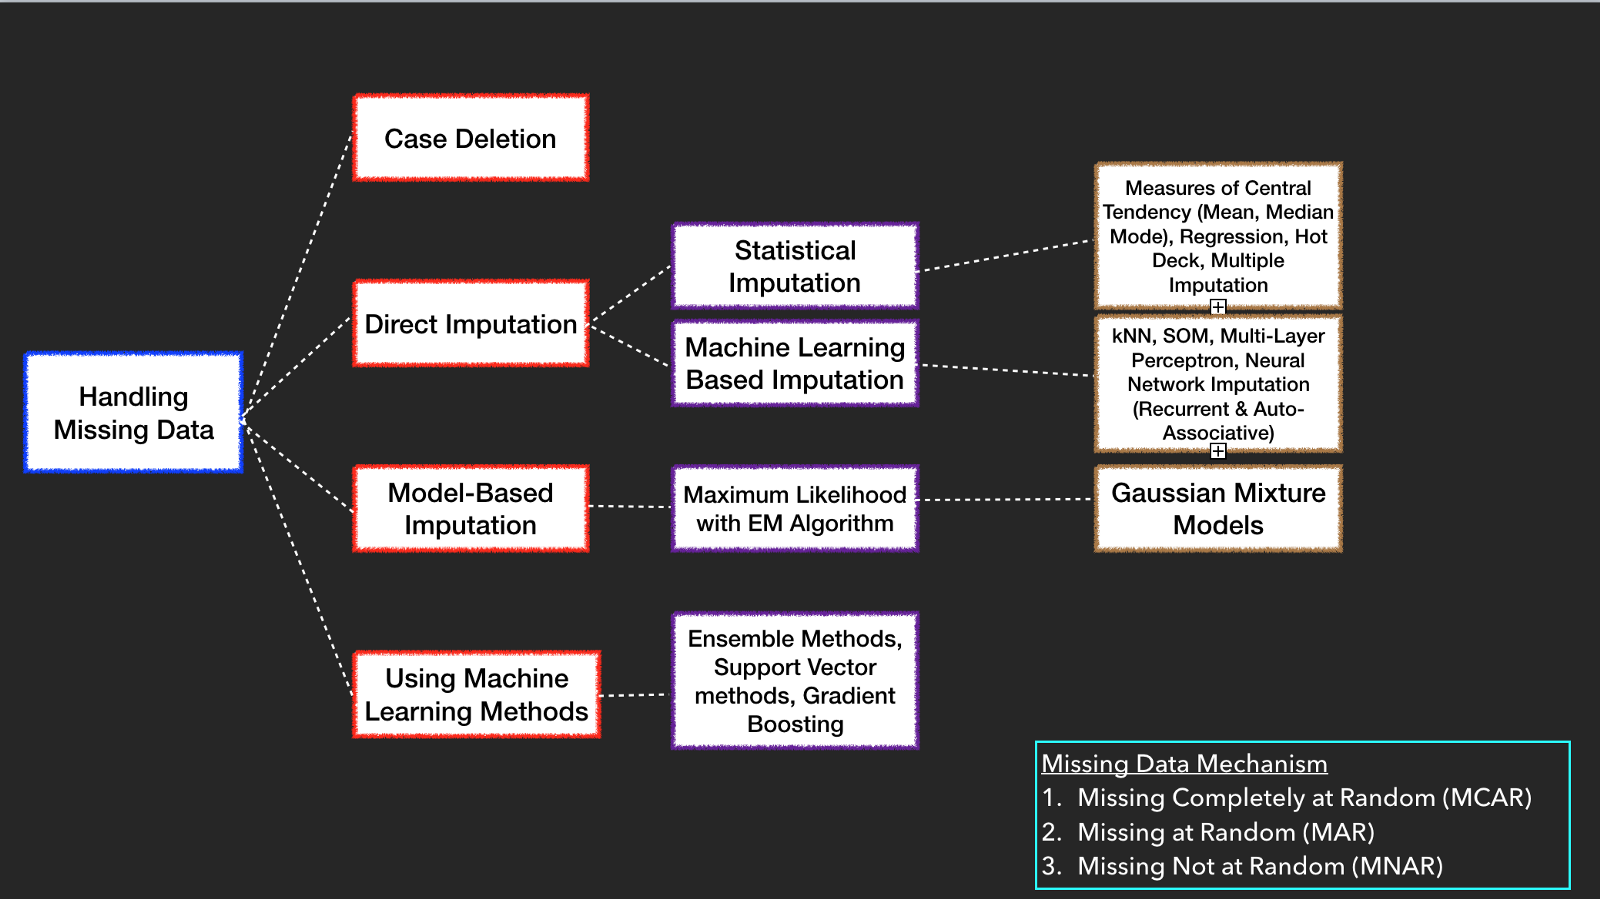

### Missing Values Treatment

- <b> Case Deletion </b>
- <b> Direct Imputation </b>
- <b> Machine Learning Based Imputaion </b>
- <b> Model Based Imputaion </b>

### <b> Case Deletion </b>

In [153]:
# Prepare Data
raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'], 
        'age': [42, np.nan, 24, 24, np.nan], 
        'sex': ['m', np.nan, 'f', np.nan, 'f'], 
        'preTestScore': [4, np.nan, np.nan, 2, 3],
        'postTestScore': [25, np.nan, np.nan, 62, 70]}

df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
# df

##### Unique Feature
- Remove rows where the Identifier is missing

In [155]:
#Unique Feature/representative of DataFrame
unique_feature = 'first_name'
df.dropna(subset=[unique_feature], inplace = True)
# df.info()

In [151]:
# df_case_deletion = df.copy()
# print('Before:', '\n\n', 'Length:', df.shape, '\n\n', df_case_deletion.isna().sum())

# Row Operations

# # Drop Rows with all missing values
# df_case_deletion.dropna(axis=0, how='all', inplace = True)
# print('After:', '\n\n', 'Length:', df_case_deletion.shape, '\n\n', df_case_deletion.isna().sum())

# # Drop Rows with any missing values
# df_case_deletion.dropna(axis=0, how='any', inplace = True)
# print('After:', '\n\n', 'Length:', df_case_deletion.shape, '\n\n', df_case_deletion.isna().sum())

# Column Operations

# # Drop Column with all missing values
# df_case_deletion.dropna(axis=1, how='all', inplace = True)
# print('After:', '\n\n', 'Length:', df_case_deletion.shape, '\n\n', df_case_deletion.isna().sum())

# # Drop Column with any missing values
# df_case_deletion.dropna(axis=1, how='any', inplace = True)
# print('After:', '\n\n', 'Length:', df_case_deletion.shape, '\n\n', df_case_deletion.isna().sum())

### <b> Direct Imputation </b>

##### <b> Fill NA </b>

In [156]:
raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'], 
        'age': [42, np.nan, 36, 24, 73], 
        'sex': ['m', np.nan, 'f', 'm', 'f'], 
        'preTestScore': [4, np.nan, np.nan, 2, 3],
        'postTestScore': [25, np.nan, np.nan, 62, 70]}

df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df

# #Fill in missing data with zeros
df.fillna(0)

# #Fill in missing in preTestScore with the mean value of preTestScore
df["preTestScore"].fillna(df["preTestScore"].mean(), inplace=True)
df

#Fill in missing in postTestScore with each sex’s mean value of postTestScore
df["postTestScore"].fillna(df.groupby("sex")["postTestScore"].transform("mean"), inplace=True)
df

# Select the rows of df where age is not NaN and sex is not NaN
df[df['age'].notnull() & df['sex'].notnull()]

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,3.0,70.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


### <b> Statistical Imputation </b>
- Numerical features
- Categorical features

In [136]:
# Prepare Data
raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'], 
        'age': [42, np.nan, 24, 24, np.nan], 
        'sex': ['m', np.nan, 'f', np.nan, 'f'], 
        'preTestScore': [4, np.nan, np.nan, 2, 3],
        'postTestScore': [25, np.nan, np.nan, 62, 70]}

df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,24.0,f,NaN,NaN
3,Jake,Milner,24.0,NaN,2.0,62.0
4,Amy,Cooze,NaN,f,3.0,70.0


In [128]:
# df.info()

In [137]:
#Extract feature names for categorical and numeric data types
categorical_features = df.select_dtypes(include='object').columns.values
numerical_features = df.select_dtypes(include='float64').columns.values

In [138]:
# Drop Rows with all missing values
df.dropna(axis=0, how='all', inplace = True)
# df

                                            ###### Numerical features

In [140]:
#Using mean
df_mean_imputation = df.copy()

imputer = Imputer(missing_values = 'NaN', strategy ='mean', axis = 0)
for feature in numerical_features:
    df_mean_imputation[feature]= imputer.fit_transform(df_mean_imputation[[feature]]).ravel().round()

#Using median
df_median_imputation = df.copy()

imputer = Imputer(missing_values = 'NaN', strategy ='median', axis = 0)
for feature in numerical_features:
    df_median_imputation[feature]= imputer.fit_transform(df_median_imputation[[feature]]).ravel().round()

#Using most_frequent
df_most_frequent_imputation = df.copy()

imputer = Imputer(missing_values = 'NaN', strategy ='most_frequent', axis = 0)
for feature in numerical_features:
    df_most_frequent_imputation[feature]= imputer.fit_transform(df_most_frequent_imputation[[feature]]).ravel().round()

df_most_frequent_imputation

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,24.0,f,2.0,25.0
3,Jake,Milner,24.0,NaN,2.0,62.0
4,Amy,Cooze,24.0,f,3.0,70.0


                                            ###### Categorical features

In [141]:
# Impute Categorical Feature Missing Values Using Mode
df_cat = df.copy()
for feature in categorical_features:
    df_cat[feature].fillna(df[feature].mode()[0], inplace=True)

df_cat

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,24.0,f,NaN,NaN
3,Jake,Milner,24.0,f,2.0,62.0
4,Amy,Cooze,NaN,f,3.0,70.0


### Machine Learning Based Imputaion

##### Using KNN Prediction Model

<b> Why using KNN ? </b>

KNN is an algorithm that is useful for matching a point with its closest k neighbors in a multi-dimensional space. It can be used for data that are continuous, discrete, ordinal and categorical which makes it particularly useful for dealing with all kind of missing data.

The assumption behind using KNN for missing values is that a point value can be approximated by the values of the points that are closest to it, based on other variables.

 y_test.ravel()

<b> KNN Implementation: </b>

Now we are fitting KNN algorithm on training data, predicting labels for dataset and printing the accuracy of the model for different values of K(ranging from 1 to N).

<b> KNeighborsClassifier(): </b> This is the classifier function for KNN. It is the main function for implementing the algorithms. Some important parameters are:

<b> Accuracy Score: </b> 

accuracy_score(): This function is used to print accuracy of KNN algorithm. By accuracy, we mean the ratio of the correctly predicted data points to all the predicted data points. Accuracy as a metric helps to understand the effectiveness of our algorithm

In [ ]:
### Read Data

df = pd.read_csv('./Dataset/test_data1.csv', header = 0, sep =',')
df.name = 'test_data'

# df.head(1)

#Data info
# df.info()

# Replace whitespace in Columns and convert to Lower case
df.columns = df.columns.str.lower().str.replace(' ', '_')
# df.info()

#define Basic features
unique_feature = 'id'
target_var = 'payment_default'

In [ ]:
#### Check for missing Values

# # df[df == 'na'] = pd.np.nan

# #Check missing values
# print(df.name)
# print(df.isna().sum())

In [23]:
df_knn = df.copy()
for x in categorical_features:
    df_knn[x + "_code"] = pd.Categorical(df_knn[x]).codes
    df_knn[x + "_code"] = df_knn[x + "_code"].astype('category')
    df_knn.drop(x, axis = 1, inplace = True)

In [26]:
#Remove ID and change dtype of target variable
df_knn['payment_default'] = df_knn['payment_default'].astype('category')
df_knn.drop('id_code', axis = 1, inplace = True)

In [57]:
# df_knn.info()

In [33]:
df_knn_train = df_knn.loc[df_knn.age != np.nan]
df_knn_test = df_knn.loc[df_knn.age.isna()]

y_train = df_knn_train['age']
y_test = df_knn_test['age']

X_train = df_knn_train.drop('age', axis = 1)
X_test = df_knn_test.drop('age', axis = 1)

y_train = y_train.ravel()
y_test = y_test.ravel()

df_knn_train.shape
# df_knn_test.shape

(9900, 24)

In [ ]:
for K in range(1):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    print(y_pred)

In [11]:
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [22]:
#Read Data
cancer_data = np.genfromtxt(fname ='./Dataset/breast-cancer-wisconsin.data', delimiter= ',', dtype= float)

In [23]:
print("Dataset Lenght:: ", len(cancer_data))
print("Dataset:: ", str(cancer_data))
print("Dataset Shape:: ", cancer_data.shape)

Dataset Lenght::  699
Dataset::  [[1.000025e+06 5.000000e+00 1.000000e+00 ... 1.000000e+00 1.000000e+00
  2.000000e+00]
 [1.002945e+06 5.000000e+00 4.000000e+00 ... 2.000000e+00 1.000000e+00
  2.000000e+00]
 [1.015425e+06 3.000000e+00 1.000000e+00 ... 1.000000e+00 1.000000e+00
  2.000000e+00]
 ...
 [8.888200e+05 5.000000e+00 1.000000e+01 ... 1.000000e+01 2.000000e+00
  4.000000e+00]
 [8.974710e+05 4.000000e+00 8.000000e+00 ... 6.000000e+00 1.000000e+00
  4.000000e+00]
 [8.974710e+05 4.000000e+00 8.000000e+00 ... 4.000000e+00 1.000000e+00
  4.000000e+00]]
Dataset Shape::  (699, 11)


In [24]:
#The cancer dataset’s first column consists of patient’s id. To make this prediction process unbiased, 
#we should remove this patient id
cancer_data = np.delete(arr = cancer_data, obj= 0, axis = 1)

X = cancer_data[:,range(0,9)]
Y = cancer_data[:,9]

In [25]:
# Impute Missing Values using median
imp = Imputer(missing_values="NaN", strategy='median', axis=0)
X = imp.fit_transform(X)

In [27]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
y_train = y_train.ravel()
y_test = y_test.ravel()

In [30]:
for K in range(5):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  95.23809523809523 % for K-Value: 1
Accuracy is  93.33333333333333 % for K-Value: 2
Accuracy is  95.71428571428572 % for K-Value: 3
Accuracy is  95.23809523809523 % for K-Value: 4
Accuracy is  95.71428571428572 % for K-Value: 5


In [58]:
# print(df.isna().sum())